# Lab 2b: Heart Disease / Scikit-Learn

Follow the steps to load the heart disease database and to train & score various classifiers with it.
The database is a modified version from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/heart+Disease):
* Lines with missing values have been removed.
* The predicted attribute in column 14 (#58) - diagnosis of heart disease (angiographic disease status) has been simplified to two classes:
  * 0... absence
  * 1... presence

## Your Name

Please enter your name in the next line (Markdown style cell):

Almesberger Marcel (dh181812)

## Exercise 1: Read about the Dataset

Check out the dataset description of [UCI](https://archive.ics.uci.edu/ml/datasets/heart+Disease). Our dataset is the Cleveland set and uses the smaller set of 14 attributes. Take a look at column 3 ("chest pain"). The values are either 1, 2, 3 or 4 in the dataset. 

Answer the following question in the next line as text (Markdown style cell): What types of chest pain do those four possible values map to?

*Hint: you'll find the answer in the "Attribute information" section of the linked web page.*

Value 1: typical angina, 
Value 2: atypical angina, 
Value 3: non-anginal pain, 
Value 4: asymptomatic 

## Exercise 2: Imports

Use the following block for all the imports you need for your notebook.
This will include pandas, numpy, seaborn and all the parts of sklearn.
Also configure matplotlib to draw graphics inline.

In [1]:
# Numpy
import numpy as np
# Pandas
import pandas as pd
# Seaborn
import seaborn as sns
# Matplotlib
%matplotlib inline
# Scikit learn modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier

## Exercise 3: Load the CSV

Load the heart-disease-fhstp.csv file and print its head to check if importing worked.

In [2]:
# load csv file
df = pd.read_csv("heart-disease-fhstp.csv")

In [3]:
# print head of csv file
df.head()

,age,gender,chest pain,rest SBP,cholesterol,fasting blood sugar > 120,rest ECG,max HR,exerc ind ang,ST by exercise,slope peak exc ST,major vessels colored,thal,diameter narrowing
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Exercise 4: Describe

Use the describe function of the Pandas DataFrame to find out the count, mean, standard deviation & more from the dataset for each column.

In [4]:
df.describe()

,age,gender,chest pain,rest SBP,cholesterol,fasting blood sugar > 120,rest ECG,max HR,exerc ind ang,ST by exercise,slope peak exc ST,major vessels colored,thal,diameter narrowing
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


## Exercise 5: Age Histogram

Print the histogram of the "age" column. Use 20 bins. This gives you a good understanding of the patients that were tested for heart diseases.

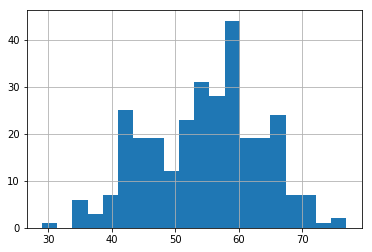

In [5]:
df.age.hist(bins=20)

## Exercise 6: Violin Plot

Use the Violin Plot of Seaborn to print the target class ("diameter narrowing") on the x axis and "max XR" on the y axis.

C:\Users\Marcel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


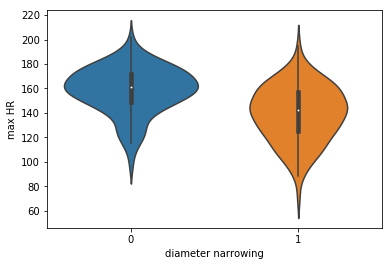

In [6]:
sns.violinplot(x="diameter narrowing", y="max HR", data=df)

## Exercise 7: Pair Plot

Draw a pair plot of the whole dataframe. Use the target class for the hue.
Note that many of the values are mapped to different observations (-> categorical features), while others are numeric features.

C:\Users\Marcel\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Marcel\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Marcel\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


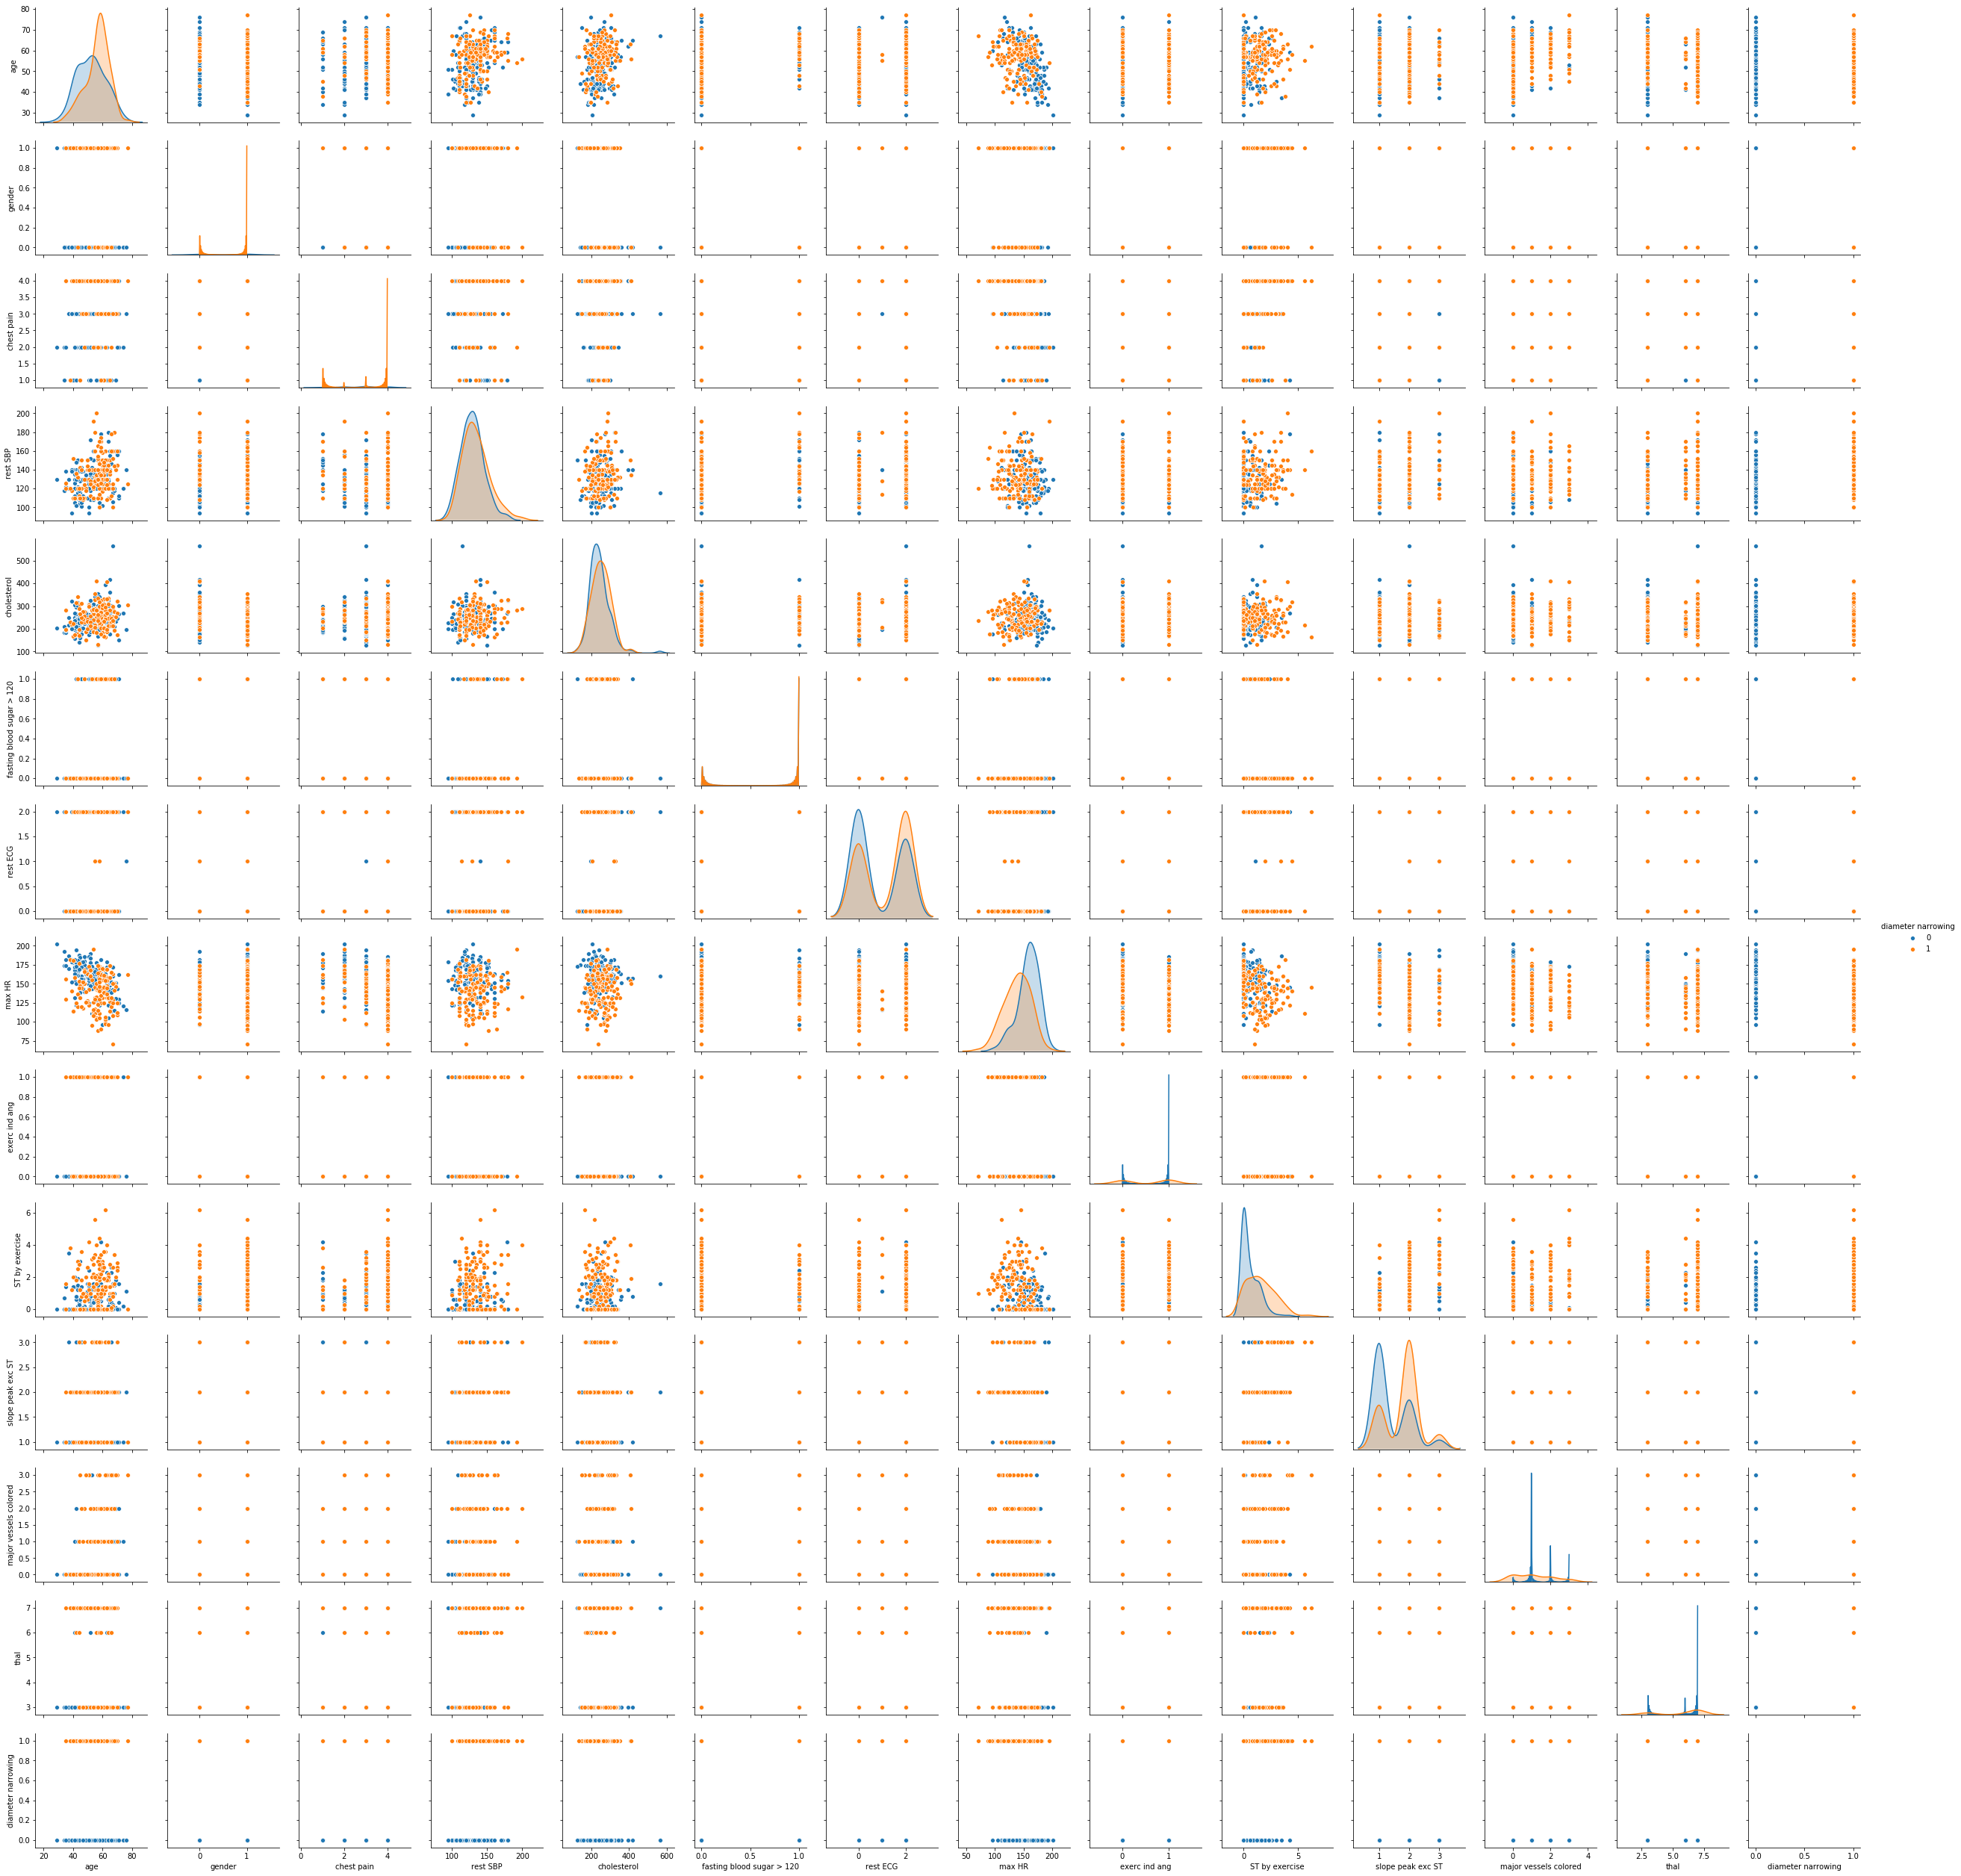

In [7]:
sns.pairplot(df, hue="diameter narrowing")

## Exercise 8: Prepare Data for Classification

Our CSV contains all the data plus the target class values. Remove (pop) the target class into an extra variable ("y").
Then split the dataframe into the 4 variables for training & test data. Use the random state 10.

In [8]:
# remove target class into variable y
y = df.pop("diameter narrowing").values

In [9]:
# splitting dataframe
X_train, X_test, y_train, y_test = train_test_split(df, y, random_state=10)

## Exercise 9: Decision Tree

Create a decision tree, fit it with the training data and score it with the test data.
Use random state 10. Configure the classifier to use a min sample split of 20.

In [10]:
# create decision tree classifier
clfTree = DecisionTreeClassifier(random_state=10, min_samples_split=20)

In [11]:
# fit classifier with training data
clfTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [12]:
# score classifier with test data
clfTree.score(X_test, y_test)

0.7733333333333333

## Exercise 10: Random Forest

Test a random forest classifier to see if it performs better than the decision tree. Use a max depth of 3, 20 estimators and a random state of 10.
Again, fit it with the train data and test with the test data.

In [13]:
# create random forest classifier
clfForest = RandomForestClassifier(max_depth=3, n_estimators=20, random_state=10)

In [14]:
# fit classifier with training data
clfForest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [15]:
# score classifier with test data
clfForest.score(X_test, y_test)

0.8

## Exercise 11: Prediction

Use the random forest classifier to predict the class of an unknown patient. Use the following measured features:
[[23.0,0.0,3.0,120.0,233.0,1.0,2.0,173.0,1.0,0.6,2.0,1.0,6.0]]

In [16]:
# predict class of unknown patient
patient = clfForest.predict([[23.0,0.0,3.0,120.0,233.0,1.0,2.0,173.0,1.0,0.6,2.0,1.0,6.0]])

In [17]:
# print prediction
print(f"Prediction for patient is: {patient}")

Prediction for patient is: [1]


## Exercise 12: Scaling

Many classifiers like k-NN, Support Vector Machines and Neural Networks work best with scaled features. Therefore, we need to scale these to make the features more comparable. For example, k-NN computes the euclidian distance - as such, normalized / standardized feature values are important.

Create the StandardScaler. Then use fit_transform() to analyze the training data and to scale it in one step. Afterwards, use transform() to scale the test data (this applies the same scaling that was learned from the training data).
Make sure to save the scaled test + train data into new variables, e.g., X_train_scaled and X_test_scaled.

In [18]:
# create scaler
scaler = StandardScaler()

In [19]:
# analyze and scale training data
X_train_scaled = scaler.fit_transform(X_train)

In [20]:
# scale test data
X_test_scaled = scaler.transform(X_test)

## Exercise 13: k-NN Classification

Create the KNeighborsClassifier. Next, fit the classifier on the *scaled* training data and score it with the *scaled* test data.

In [21]:
# create k-NN classifier
clfKnn = KNeighborsClassifier()

In [22]:
# fit classifier with scaled training data
clfKnn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [23]:
# score classifier with scaled test data
clfKnn.score(X_test_scaled, y_test)

0.8

## Exercise 14: Support Vector Machine

Create a support vector classifier (SVC). Use "scale" as gamma and a random state of 10.
Next, fit the classifier on the *scaled* training data and score it with the *scaled* test data.

In [24]:
# create support vector machine classifier
clfSvm = svm.SVC(gamma="scale", random_state=10)

In [25]:
# fit classifier with scaled training data
clfSvm.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=10, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
# score classifier with scaled test data
clfSvm.score(X_test_scaled, y_test)

0.8266666666666667

## Exercise 15: Neural Network

As a final classifier, create a neural network (multi-layer perceptron). As before, specify the random_state of 10. Use 2000 maximum iterations when configuring the classifier. Again, fit and score the classifier on the *scaled* data.

In [27]:
# create neural network classifier
clfNn = MLPClassifier(random_state=10, max_iter=2000)

In [28]:
# fit classifier with scaled training data
clfNn.fit(X_train_scaled, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=10, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [29]:
# score classifier with scaled test data
clfNn.score(X_test_scaled, y_test)

0.8533333333333334

## Exercise 16: Final Checks & the best classifier

To make sure that your whole Jupyter Notebook executes without issues, choose "Kernel -> Restart Kernel and Run All Cells...". Make sure it actually restarts executing all cells - if not, select the command again. Make sure all the lines you wrote execute and that you get the scores.

Answer in the following line as text (Markdown style cell): which classifier got the highest accuracy for the data?

Classifier with the highest accuracy: Neural Network